In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.losses import BinaryCrossentropy # Search And Find Difference

In [16]:
# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
# Flatten the images for the Single Layer Perceptron
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape((x_test.shape[0], -1))

In [7]:
x_train_flat.shape

(60000, 784)

In [8]:
x_test_flat.shape

(10000, 784)

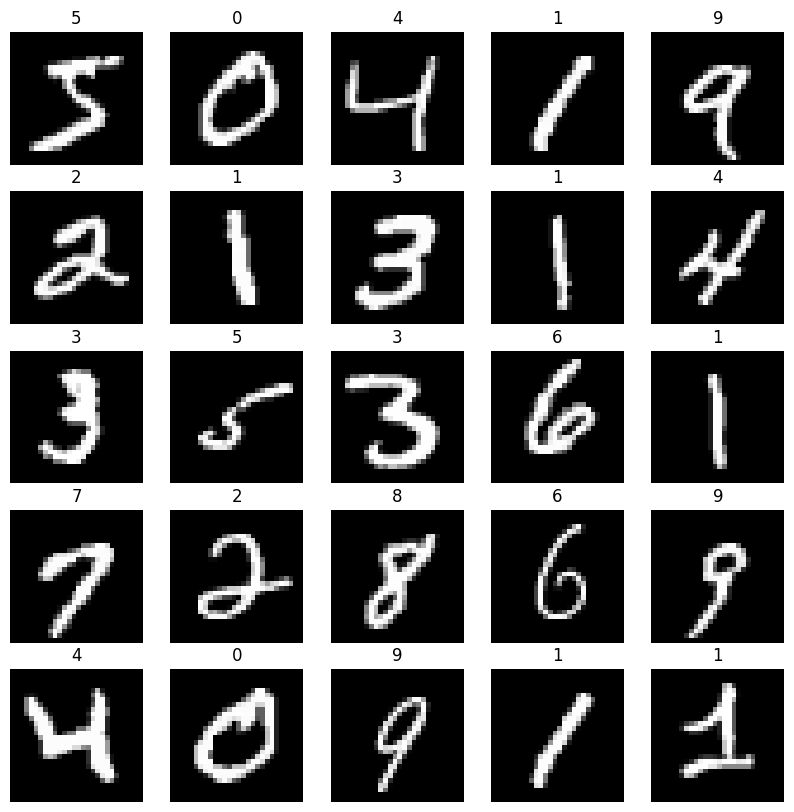

In [9]:
# Display some images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [19]:
# Build the Single Layer Perceptron model
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(10, activation='sigmoid')  
    # Output layer with 10 neurons (for 10 classes) and sigmoid activation
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_flat, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print(f'\nTest accuracy: {test_acc * 100:.2f}\nTest Lose : {test_loss}')

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4716 - accuracy: 0.8769
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2614 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9289
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9301
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2648 

313/313 [==============================] - 1s 2ms/step


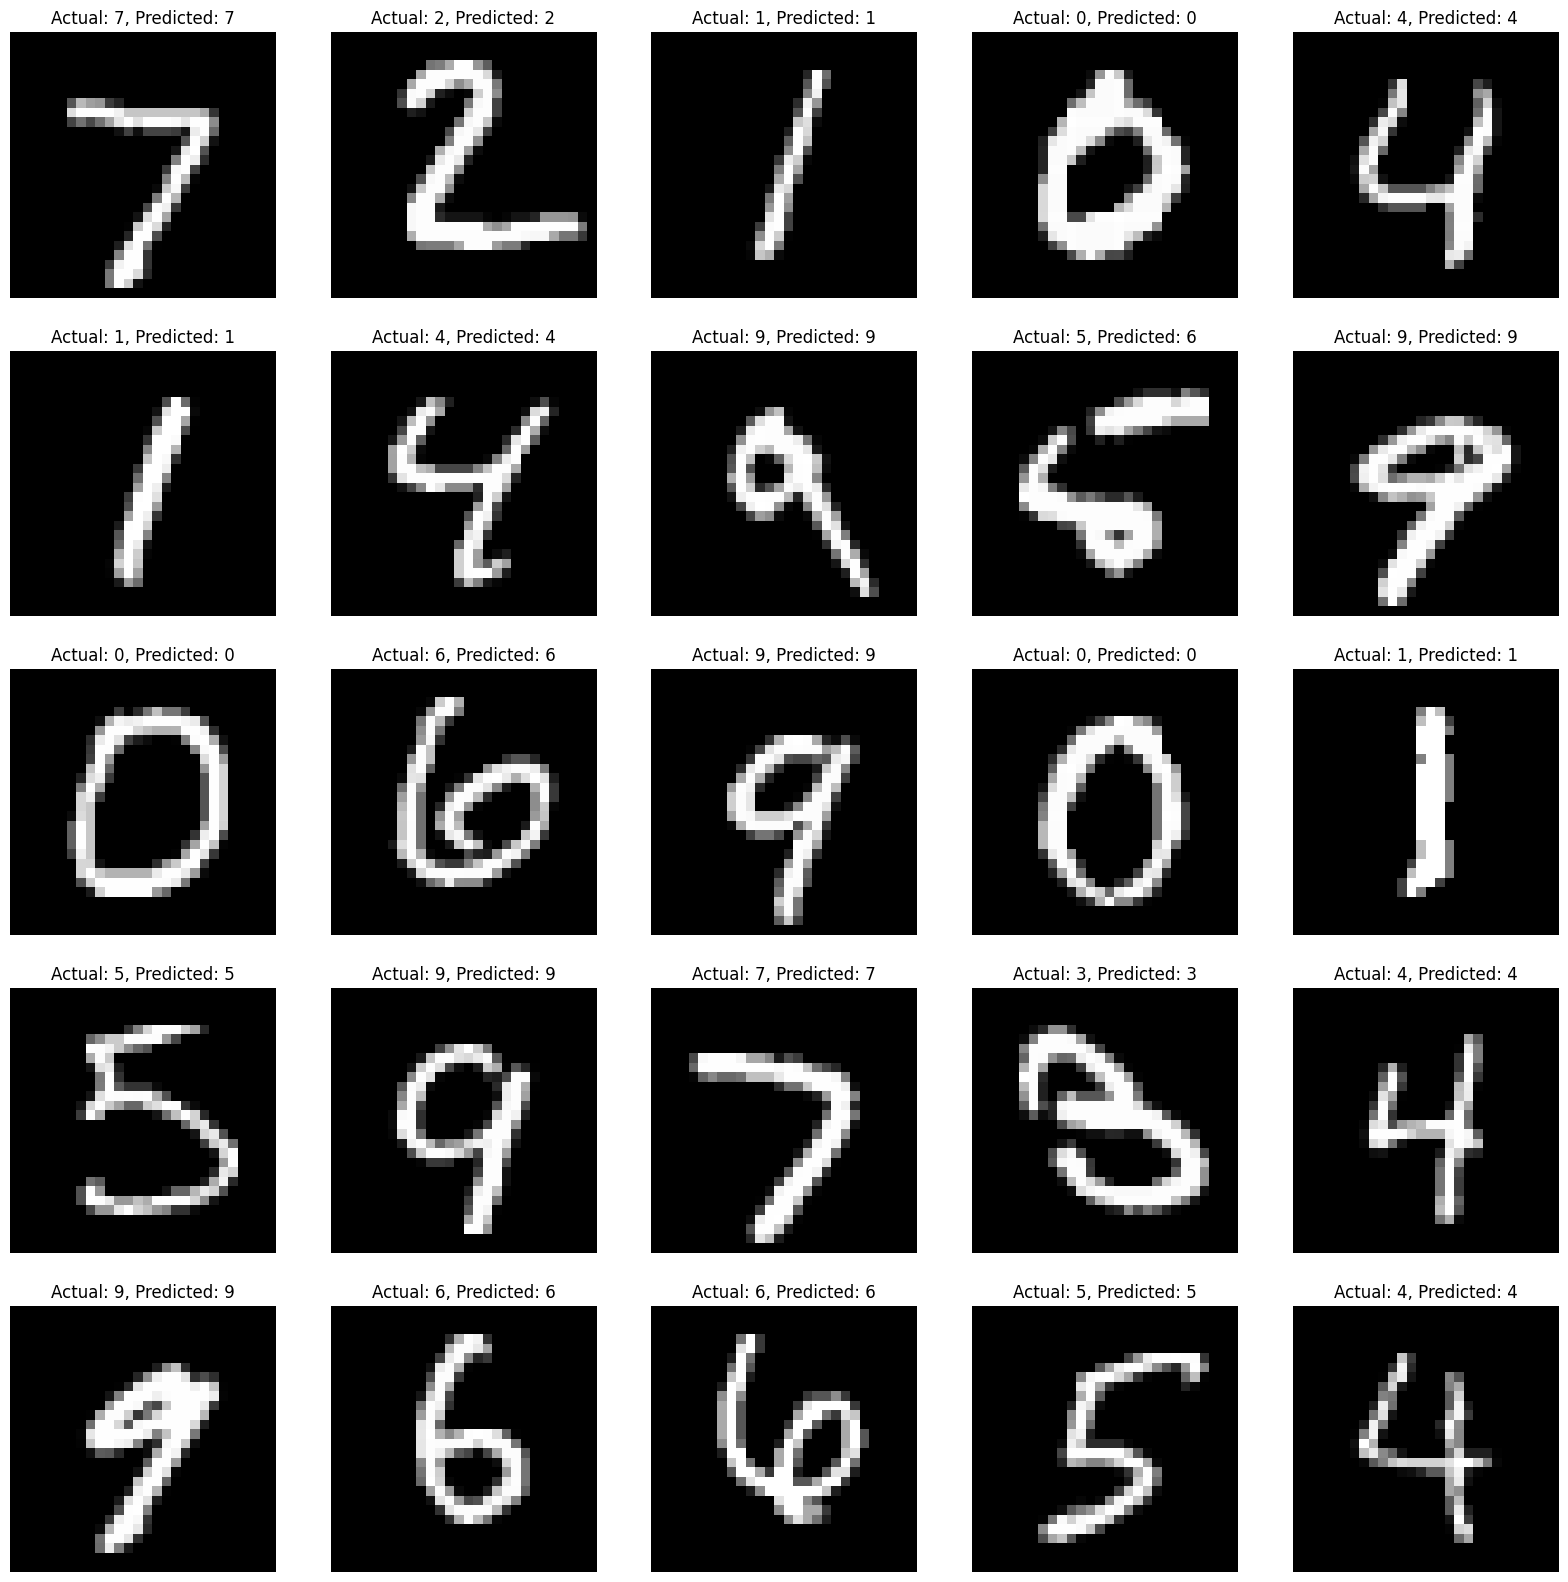

In [11]:
# Predictions
predictions = model.predict(x_test_flat)

# Visualize some predictions
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Actual: {y_test[i]}, Predicted: {tf.argmax(predictions[i])}')
    plt.axis('off')
plt.show()

# Thanks !